In [172]:
import os
import numpy as np
import pickle
import dill
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [112]:
path_wdir   =   "/Users/amanda/Desktop/Paper/technical/"
path_data   =   os.path.join(path_wdir, "data/")
path_flury  =   os.path.join(path_data, 'flury/')
path_mock   =   os.path.join(path_data, 'mock/')

#--------------------------------------------------------Results------------------------------------------------------------------------

with open(path_data + 'iot.dat', 'rb') as f:
    iot = dill.load(f)


In [259]:
## Write all results in one dic

iot     =   {}

names   =   ['iot_13', 'iot_12', 'iot_10', 'iot_9', 'iot_11'] 
numbers =   ['13', '12', '10', '9', '11']

for i in range(5):
    with open(path_data + 'eout_iot'+numbers[i]+'.dat', 'rb') as f:
        iot_part = dill.load(f)
    iot[names[i]] = iot_part

filename = path_data + 'iot.dat'

for i in range(5):
    act = iot[names[i]]['frac_esc_in']
    pre = iot[names[i]]['frac_esc_out']
    unc = iot[names[i]]['unc']

    chi_array   =   [] 
    WMSE        =   0
    for j in range(len(unc)):
        WMSE = WMSE + (act[j] - pre[j])**2 / (unc[j]**2)
        chi_array.append(WMSE)

    WRMSE = np.sqrt(WMSE)
    iot[names[i]]['chisq']      =   WMSE 
    iot[names[i]]['chi']        =   WRMSE 
    iot[names[i]]['chi_array']  =   chi_array 

iot['snr']  =   [3, 5, 10, 20, 30]


with open(filename, 'wb') as f:
    dill.dump(iot, f)

/var/folders/3z/mlgchl453_z7stf4n4v_bzg40000gn/T/ipykernel_44381/1058440010.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes[0].plot(iot[names[i]]['frac_esc_in'], chi_ar, '.', color = colors[i],  marker=markers[i], label = 'SNR: '+str(snr[i])+', '+str(chisq[i]), markersize =7)
/var/folders/3z/mlgchl453_z7stf4n4v_bzg40000gn/T/ipykernel_44381/1058440010.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes[1].plot(snr[i], chi[i], '.', color = colors[i],  marker=markers[i])
/var/folders/3z/mlgchl453_z7stf4n4v_bzg40000gn/T/ipykernel_44381/1058440010.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes[2].plot(snr[i], chisq[i], '.', c

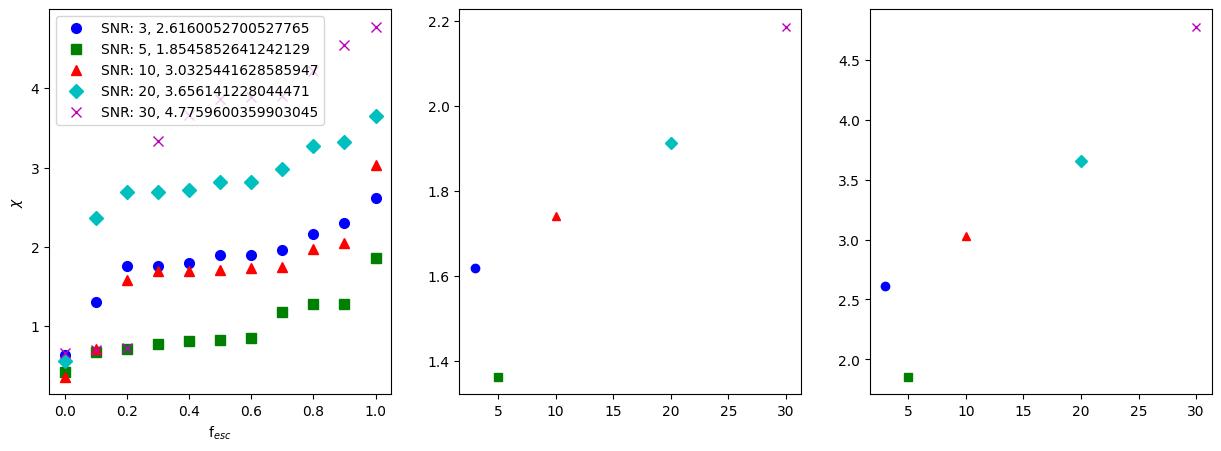

In [260]:
colors  =   ['b', 'g', 'r', 'c', 'm']
markers =   ['o', 's', '^', 'D', 'x']
snr     =   iot['snr']

chisq   =   []
chi     =   [] 

for i in range(5):
    chisq.append(iot[names[i]]['chisq'])
    chi.append(iot[names[i]]['chi'])




fig, axes = plt.subplots(1, 3, figsize=(15, 5))


for i in range(5):
    chi_ar = iot[names[i]]['chi_array']
    axes[0].plot(iot[names[i]]['frac_esc_in'], chi_ar, '.', color = colors[i],  marker=markers[i], label = 'SNR: '+str(snr[i])+', '+str(chisq[i]), markersize =7)



axes[0].set_ylabel('$\chi$')
axes[0].set_xlabel('f$_{esc}$')
axes[0].legend()

for i in range(5):
    axes[1].plot(snr[i], chi[i], '.', color = colors[i],  marker=markers[i])
    axes[2].plot(snr[i], chisq[i], '.', color = colors[i],  marker=markers[i])

/var/folders/3z/mlgchl453_z7stf4n4v_bzg40000gn/T/ipykernel_44381/3985915760.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, z, '.', alpha=1,  color = colors[i],  marker=markers[i], label = 'SNR: '+snr[i])


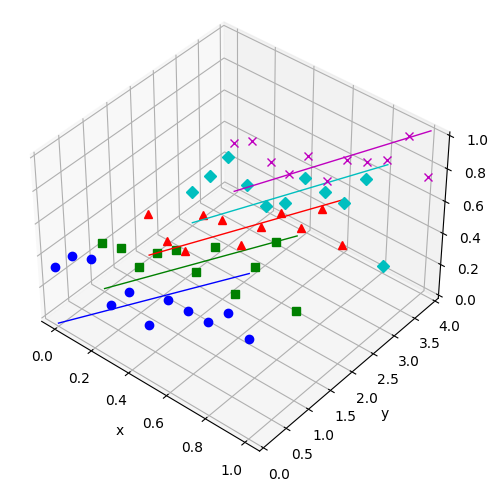

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors  =   ['b', 'g', 'r', 'c', 'm']
markers =   ['o', 's', '^', 'D', 'x']
snr     =   ['3', '5', '30', '10', '20']

for i in range(5):
    x = iot[names[i]]['frac_esc_in']
    z = iot[names[i]]['frac_esc_out']
    y = [i for j in range(len(z))]
    #ax.add_collection3d(plt.fill_between(x,z, color='lightsteelblue', alpha=0.1,label="filled plot"),n, zdir='y')
    ax.plot(x, y, z, '.', alpha=1,  color = colors[i],  marker=markers[i], label = 'SNR: '+snr[i])
    ax.plot(np.linspace(0,1,100 ), [i for j in range(100)], np.linspace(0,1,100 ),  lw=1, color = colors[i])


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Define the plane's parameters
normal = np.array([1, 0, 1])  # Normal vector of the plane
point = np.array([0, 0, 0])   # A point on the plane

# Create a meshgrid for plotting
x_range = np.linspace(0, 1, 50)
y_range = np.linspace(0, 4, 50)
X, Y = np.meshgrid(x_range, y_range)

# Calculate corresponding z values for the plane using the equation of a plane
Z = (normal[0] * X - normal[1] * Y - np.dot(normal, point)) / normal[2]

# Plot the plane using plot_surface
#surface = ax.plot_surface(X, Y, Z, alpha=0.5, linewidth=6)

# Adjust the linewidth of the surface edges


ax.set_ylim(0,4)
elevation_angle = 40
azimuth_angle = 310
ax.view_init(elevation_angle, azimuth_angle)
plt.tight_layout()

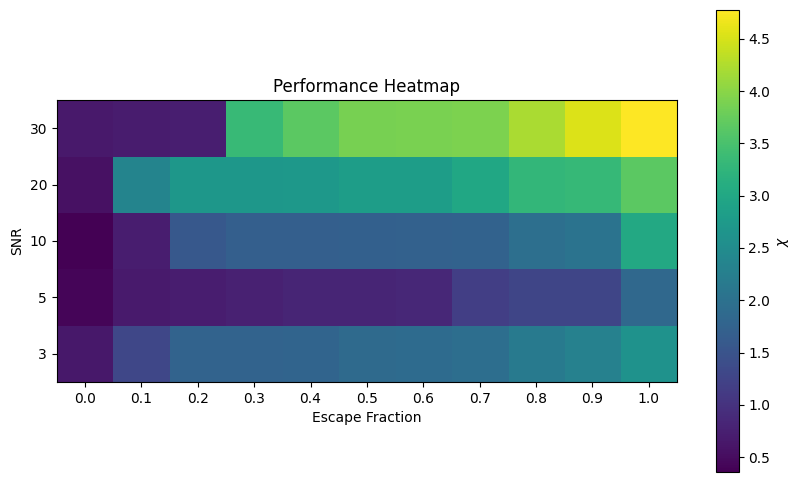

In [267]:
# Example data (replace with your actual data)
colors  =   ['b', 'g', 'r', 'c', 'm']
markers =   ['o', 's', '^', 'D', 'x']
snr     =   iot['snr']

escape_fractions    =   iot['iot_13']['frac_esc_in']
performance_data    =   []  

for i in ['iot_13', 'iot_12', 'iot_10', 'iot_9', 'iot_11']:
    performance_data.append(iot[i]['chi_array'])    


# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(performance_data, cmap='viridis', origin='lower')

# Set axis labels and title
plt.xticks(np.arange(len(escape_fractions)), escape_fractions)
plt.xlabel('Escape Fraction')
plt.yticks(np.arange(len(snr)), snr)
plt.ylabel('SNR')
plt.title('Performance Heatmap')

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('$\chi$')

plt.show()

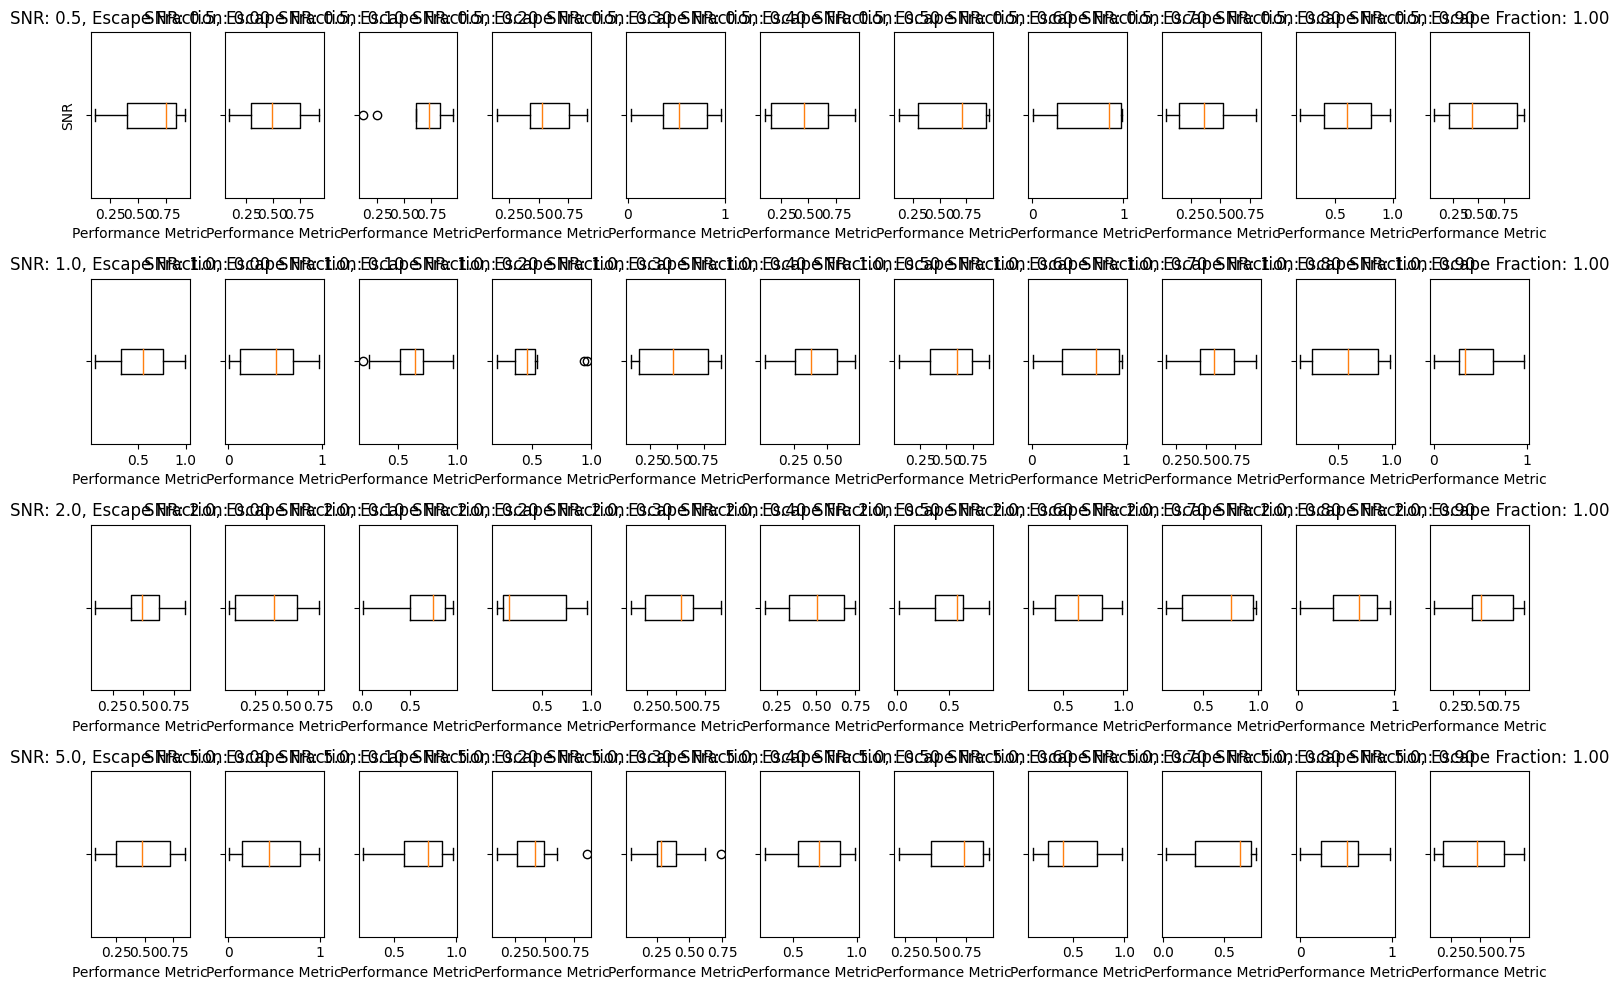

In [266]:
# Example data (replace with your actual data)
snr_values = [0.5, 1.0, 2.0, 5.0]
escape_fractions = np.linspace(0, 1, 11)
performance_data = np.random.rand(len(snr_values), len(escape_fractions), 10)  # Replace with your actual performance data

# Create subplots
fig, axes = plt.subplots(len(snr_values), len(escape_fractions), figsize=(15, 10))

# Loop through SNR and escape fractions
for i, snr in enumerate(snr_values):
    for j, escape_fraction in enumerate(escape_fractions):
        # Create a box plot for each combination of SNR and escape fraction
        axes[i, j].boxplot(performance_data[i, j], vert=False)
        axes[i, j].set_title(f'SNR: {snr}, Escape Fraction: {escape_fraction:.2f}')
        axes[i, j].set_xlabel('Performance Metric')
        axes[i, j].set_yticklabels([])  # Hide y-axis labels

# Set common y-label for the first column
axes[0, 0].set_ylabel('SNR')

# Adjust layout and spacing
plt.tight_layout()

plt.show()

In [264]:
iot.keys()

dict_keys(['iot_13', 'iot_12', 'iot_10', 'iot_9', 'iot_11', 'snr'])

In [ ]:
iot[i]['chi_array']